In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
!apt-get install swig -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 40 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (10.4 MB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking

In [ ]:
!pip install cython numpy

In [ ]:
!pip install auto-sklearn

     |████████████████████████████████| 6.3 MB 10.3 MB/s 
     |████████████████████████████████| 28.5 MB 38 kB/s 
     |████████████████████████████████| 22.3 MB 22.3 MB/s 
     |████████████████████████████████| 722 kB 92.0 MB/s 
     |████████████████████████████████| 4.2 MB 71.9 MB/s 
     |████████████████████████████████| 4.0 MB 4.5 MB/s 
     |████████████████████████████████| 208 kB 81.7 MB/s 
     |████████████████████████████████| 973 kB 81.3 MB/s 
     |████████████████████████████████| 119 kB 74.8 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.13.0-py3-none-any.whl size=6567738 sha256=ae5c54f2e4fc8262f008634e8acb6f9f2f2e1a0f0bd8ed614d304f0e62279f34
  Stored in directory: /root/.cache/pip/wheels/e8/42/a0/2382eb3f1fdf1c90da8a5302c37f07151128ec64f24c482616
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=082347f7e3ea7a966dfa45521bbcd6718d555fb04fa5bed0e21ca28e68322a1b
  Stored in directory: /root/.cache/pip/wheels/42/71/9

In [ ]:
pip install scipy==1.7.0

     |████████████████████████████████| 28.5 MB 32 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import autosklearn.classification as classifier

In [ ]:
thermal = pd.read_csv("/content/Book7.csv")
thermal


,number,Age,wrist_temp,Fore_head_temp
0,1,73,36.80,35.88
1,2,59,35.71,37.00
2,3,66,35.33,36.51
3,4,80,35.94,37.89
4,5,85,35.66,37.23
...,...,...,...,...
1272,1273,57,35.00,38.15
1273,1274,62,36.80,35.42
1274,1275,76,35.01,35.80
1275,1276,77,35.14,37.81


In [ ]:
p=thermal[['wrist_temp','Age']]
q=thermal[['Fore_head_temp']]
x=thermal[['wrist_temp','Age']].astype(int)
y=thermal[['Fore_head_temp']].astype(int)


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=124)
p_train,p_test,q_train,q_test= train_test_split(x,y,test_size=0.2,random_state=124)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_test,y_test)

-0.009728766445834314

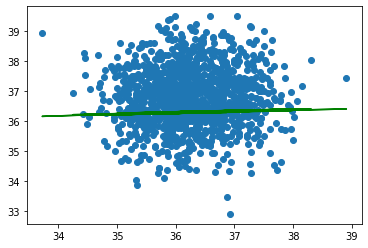

In [ ]:
plt.scatter(thermal.wrist_temp,thermal.Fore_head_temp)
plt.plot(thermal.wrist_temp,model.predict(x),color='green')

In [ ]:
parameters = [{
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}]

#2. Type of regressor 
reg = SVR(C=5)

#3. Regression evaluation cannot be done using f1_macro, so updated NMSE
clf = GridSearchCV(reg, parameters, cv=5, scoring='neg_mean_squared_error')
clf.fit(p_train, q_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

GridSearchCV(cv=5, estimator=SVR(C=5),
             param_grid=[{'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}],
             scoring='neg_mean_squared_error')

In [ ]:
d= pd.DataFrame(clf.cv_results_)
d

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035307,0.002436,0.009810,0.000237,1,rbf,"{'C': 1, 'kernel': 'rbf'}",-1.046074,-1.153124,-1.235747,-1.171509,-0.949445,-1.111180,0.101304,4
1,0.083358,0.009367,0.006122,0.000068,1,linear,"{'C': 1, 'kernel': 'linear'}",-1.046087,-1.153140,-1.235490,-1.170786,-0.949214,-1.110943,0.101229,1
2,0.060058,0.009735,0.009943,0.000316,10,rbf,"{'C': 10, 'kernel': 'rbf'}",-1.046185,-1.152712,-1.237049,-1.178350,-0.949745,-1.112808,0.102325,5
3,0.570343,0.061191,0.006533,0.000237,10,linear,"{'C': 10, 'kernel': 'linear'}",-1.046097,-1.153153,-1.235490,-1.170785,-0.949227,-1.110950,0.101224,3
4,0.078716,0.011062,0.011100,0.001324,20,rbf,"{'C': 20, 'kernel': 'rbf'}",-1.046243,-1.152412,-1.239160,-1.178658,-0.949705,-1.113235,0.102861,6
5,1.150314,0.207562,0.006245,0.000072,20,linear,"{'C': 20, 'kernel': 'linear'}",-1.046098,-1.153143,-1.235491,-1.170785,-0.949218,-1.110947,0.101227,2


In [ ]:
d[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,-1.111180
1,1,linear,-1.110943
2,10,rbf,-1.112808
3,10,linear,-1.110950
4,20,rbf,-1.113235
5,20,linear,-1.110947


In [ ]:
import sklearn.datasets
import sklearn.metrics

import autosklearn.regression

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=120,per_run_time_limit=30,)
automl.fit(p_train,q_train)

[WARNING] [2021-09-12 03:38:17,633:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1


AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120)

In [ ]:
automl.score(x,y)

-0.000670512695609915

In [ ]:
from sklearn.model_selection import GridSearchCV
cl = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
cl.fit(x_train,y_train)
cl.cv_results_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/

{'mean_fit_time': array([0.04248662, 0.04624343, 0.04846444, 0.19508066, 0.05128655,
        0.34552879]),
 'mean_score_time': array([0.01128778, 0.00658889, 0.0106082 , 0.0070333 , 0.01074486,
        0.00671806]),
 'mean_test_score': array([0.38390722, 0.39471066, 0.3457054 , 0.39471066, 0.34373984,
        0.39471066]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],
 'rank_test_score': array([4, 1, 5, 1, 6, 1], dtype=int32),
 'split0_test_score': array([0.41463415, 0.39

In [ ]:
df= pd.DataFrame(cl.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.042487,0.001466,0.011288,0.000706,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.414634,0.397059,0.382353,0.387255,0.338235,0.383907,0.025364,4
1,0.046243,0.002539,0.006589,0.000231,1,linear,"{'C': 1, 'kernel': 'linear'}",0.395122,0.397059,0.397059,0.392157,0.392157,0.394711,0.002202,1
2,0.048464,0.002396,0.010608,0.000360,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.380488,0.397059,0.333333,0.318627,0.299020,0.345705,0.037183,5
3,0.195081,0.012340,0.007033,0.000529,10,linear,"{'C': 10, 'kernel': 'linear'}",0.395122,0.397059,0.397059,0.392157,0.392157,0.394711,0.002202,1
4,0.051287,0.002475,0.010745,0.000144,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.385366,0.397059,0.333333,0.323529,0.279412,0.343740,0.042966,6
5,0.345529,0.019075,0.006718,0.000221,20,linear,"{'C': 20, 'kernel': 'linear'}",0.395122,0.397059,0.397059,0.392157,0.392157,0.394711,0.002202,1


In [ ]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.383907
1,1,linear,0.394711
2,10,rbf,0.345705
3,10,linear,0.394711
4,20,rbf,0.343740
5,20,linear,0.394711


In [ ]:
predict_svc = SVC(C=20,gamma='auto',kernel='linear')
predict_svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=20, gamma='auto', kernel='linear')

In [ ]:
predict_svc.score(x_test,y_test)

0.31640625

In [ ]:
autoclassifier=classifier.AutoSklearnClassifier(time_left_for_this_task=240,per_run_time_limit=30)

In [ ]:
autoclassifier.fit(x,y)

AutoSklearnClassifier(per_run_time_limit=30, time_left_for_this_task=240)

In [ ]:
autoclassifier.score(x_test,y_test)

0.3984375

In [ ]:
autoclassifier.cv_results_['params'][np.argmax(autoclassifier.cv_results_['mean_test_score'])]

{'balancing:strategy': 'none',
 'classifier:__choice__': 'adaboost',
 'classifier:adaboost:algorithm': 'SAMME.R',
 'classifier:adaboost:learning_rate': 0.022101679847806793,
 'classifier:adaboost:max_depth': 5,
 'classifier:adaboost:n_estimators': 422,
 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding',
 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense',
 'data_preprocessing:numerical_transformer:imputation:strategy': 'median',
 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer',
 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': 484,
 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution': 'uniform',
 'feature_preprocessor:__choice__': 'select_percentile_classification',
 'feature_preprocessor:select_percentile_classification:percentile': 22.60324582008875,
 'feature_preprocessor:sel

In [ ]:
sc_x= StandardScaler()
x_train_scaled = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')

In [ ]:
classifier.fit(x_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
classifier.score(x_test,y_test)

0.29296875

In [ ]:
classifier.predict([[80,34.55]])

array([36])

In [ ]:
import numpy as np                                                               
from numpy.random import normal                                                  
import matplotlib.pyplot as plt
from scipy.stats import norm 
import seaborn as sns  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


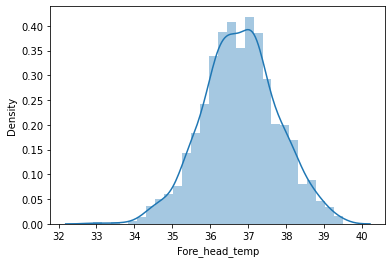

In [ ]:
sns.distplot(thermal.Fore_head_temp)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


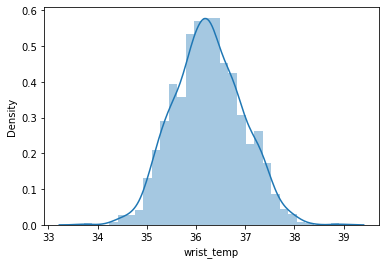

In [ ]:
sns.distplot(thermal.wrist_temp)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


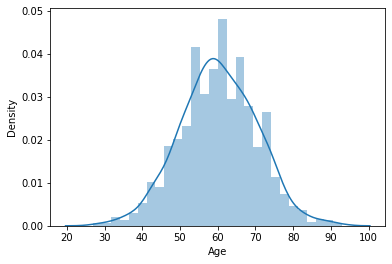

In [ ]:
sns.distplot(thermal.Age)